In [21]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import random
np.random.seed(18)
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X  = np.concatenate((X0, X1, X2), axis = 0)
K = 3 # 3 clusters
original_label = np.asarray([0]*N + [1]*N + [2]*N).T
def kmeans_init_centroids(X, k):
    # randomly pick k rows of X as inital centroids
    return X[np.random.choice(X.shape[0], k, replace = False)]
def kmeans_assign_labels(X, centroids):
    # Calculate pairwise distance btw data and centroids
    D = cdist(X, centroids)
    return np.argmin(D, axis = 1) 
    # return True if two sets of centroids are the same
def has_converged(centroids, new_centroids):
    return (set([tuple(a) for a in centroids]) == set([tuple(a) for a in new_centroids]))
def kmeans_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        Xk = X[labels == k, :]
        centroids[k,:] = np.mean(Xk, axis = 0)
    return centroids

In [20]:

def kmeans(X, K):
    centroids = [kmeans_init_centroids(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centroids[-1])) 
        new_centroids = kmeans_update_centroids(X, labels[-1], K)
        if has_converged(centroids[-1], new_centroids):
            break
        centroids.append(new_centroids)
        it+=1
    return(centroids,labels, it)

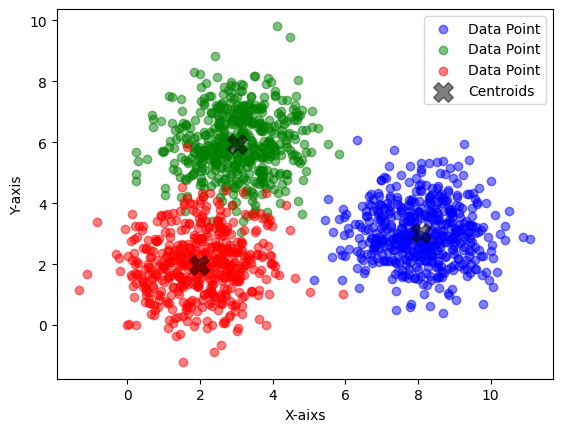

In [66]:
centroids,labels, it = kmeans(X, K)
plt.scatter(X1[:,0], X1[:, 1], alpha = 0.5, color = 'blue', label = 'Data Point')
plt.scatter(X2[:,0], X2[:, 1], alpha = 0.5, color = 'green',label = 'Data Point')
plt.scatter(X0[:,0], X0[:, 1], alpha = 0.5, color = 'red',label = 'Data Point')
plt.scatter(centroids[-1][:,0], centroids[-1][:,1], marker='X', alpha=0.5, s = 200, color = 'black', label = 'Centroids')
plt.legend()
plt.xlabel('X-aixs')
plt.ylabel('Y-axis')
plt.show()

In [67]:
print(centroids[-1])

[[8.07476866 3.01494931]
 [3.02702878 5.95686115]
 [1.9834967  1.96588127]]
